In [1]:
import nest
import os
import anndata
import scipy
import sklearn.metrics
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
import squidpy as sq
import networkx as nx
from pathlib import Path
import time
from tqdm import tqdm
from scipy.sparse import csr_matrix
from scipy.stats import pearsonr


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc

import leidenalg as la
import igraph as ig
from scipy.sparse import coo_array
from scipy.spatial.distance import cdist
from scipy.spatial import KDTree
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as colors

import warnings
warnings.filterwarnings("ignore")

In [2]:
available_datasets = ["V1_Mouse_Brain_Sagittal_Anterior", "V1_Mouse_Brain_Sagittal_Posterior", "seqfish", "merfish",
                     "slideseq", "V1_Breast_Cancer_Block_A_Section_1"]
dataset = "merfish"

In [3]:
cache_dir = os.path.expanduser(f"data/{dataset}")
image_save_dir = os.path.expanduser(f"images/{dataset}/")
from pathlib import Path
Path(image_save_dir).mkdir(parents=True, exist_ok=True)
nest.plot.set_dataset_plot_parameters(dataset)

In [4]:
adata = sq.datasets.merfish()
bregma_values = pd.unique(adata.obs.Bregma)
adata_sub = adata[adata.obs['Bregma'] == bregma_values[-1]]
adata.uns['um_scale'] = 0.001
adata.obs['z'] = adata.obs.Bregma*0.01

In [5]:
%%time
cc = nest.methods.CellChat()

# Run the CellChat analysis through rpy2
res = cc.run(adata, group_by="Cell_class")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    [1] "Create a CellChat object from a SingleCellExperiment object"
The `logcounts` assay is used 
The `colData` assay in the SingleCellExperiment object is used as cell meta information 
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Ambiguous Astrocyte Endothelial 1 Endothelial 2 Endothelial 3 Ependymal Excitatory Inhibitory Microglia OD Immature 1 OD Immature 2 OD Mature 1 OD Mature 2 OD Mature 3 OD Mature 4 Pericytes 
An object of class CellChat created from a single dataset 
 161 genes.
 73655 cells. 
CellChat analysis of single cell RNA-seq data! 
Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-BI H2-Ea-ps 
  |                                                  | 0 % ~calculating   |+++++                  

R[write to console]: 
Attaching package: ‘Matrix’


R[write to console]: The following object is masked from ‘package:S4Vectors’:

    expand




truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2023-09-12 23:06:09.762681]"


  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |====                                                                  |   6%
  |                                                                            
  |=========                                                             |  12%
  |                                                                            
  |=============                                                         |  19%
  |                                                                            
  |==================                                                    |  25%
  |                                                                            
  |======================                                                |  31%
  |                                     

[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2023-09-12 23:06:40.820865]"
An object of class CellChat created from a single dataset 
 161 genes.
 73655 cells. 
CellChat analysis of single cell RNA-seq data! 


In [6]:
%%time
# Compute CellChat analysis just for one layer
res2 = cc.run(adata_sub, group_by="Cell_class")

[1] "Create a CellChat object from a SingleCellExperiment object"
The `logcounts` assay is used 
The `colData` assay in the SingleCellExperiment object is used as cell meta information 
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Ambiguous Astrocyte Endothelial 1 Endothelial 2 Endothelial 3 Ependymal Excitatory Inhibitory Microglia OD Immature 1 OD Immature 2 OD Mature 1 OD Mature 2 OD Mature 3 OD Mature 4 Pericytes 
An object of class CellChat created from a single dataset 
 161 genes.
 5584 cells. 
CellChat analysis of single cell RNA-seq data! 
Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-BI H2-Ea-ps 
  |                                                  | 0 % ~calculating   |++++                                              | 7 % ~00s           |+++++++                                           | 13% ~00s           |++++++++++                                        | 20% ~00s           |++

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |=====                                                                 |   7%
  |                                                                            
  |=========                                                             |  13%
  |                                                                            
  |==============                                                        |  20%
  |                                                                            
  |===================                                                   |  27%
  |                                                                            
  |=======================                                               |  33%
  |                                     

[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2023-09-12 23:06:47.825207]"
An object of class CellChat created from a single dataset 
 161 genes.
 5584 cells. 
CellChat analysis of single cell RNA-seq data! 


In [8]:
%%time
cc = nest.methods.CellChat()
cc.cellchat_score(adata_sub, interaction="Tac1  - Tacr1", group_by="Cell_class")

[1] "Create a CellChat object from a SingleCellExperiment object"
The `logcounts` assay is used 
The `colData` assay in the SingleCellExperiment object is used as cell meta information 
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Ambiguous Astrocyte Endothelial 1 Endothelial 2 Endothelial 3 Ependymal Excitatory Inhibitory Microglia OD Immature 1 OD Immature 2 OD Mature 1 OD Mature 2 OD Mature 3 OD Mature 4 Pericytes 
An object of class CellChat created from a single dataset 
 161 genes.
 5584 cells. 
CellChat analysis of single cell RNA-seq data! 
Issue identified!! Please check the official Gene Symbol of the following genes:  
 H2-BI H2-Ea-ps 
  |                                                  | 0 % ~calculating   |++++                                              | 7 % ~00s           |+++++++                                           | 13% ~00s           |++++++++++                                        | 20% ~00s           |++

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |=====                                                                 |   7%
  |                                                                            
  |=========                                                             |  13%
  |                                                                            
  |==============                                                        |  20%
  |                                                                            
  |===================                                                   |  27%
  |                                                                            
  |=======================                                               |  33%
  |                                     

[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2023-09-12 23:06:54.677431]"
An object of class CellChat created from a single dataset 
 161 genes.
 5584 cells. 
CellChat analysis of single cell RNA-seq data! 


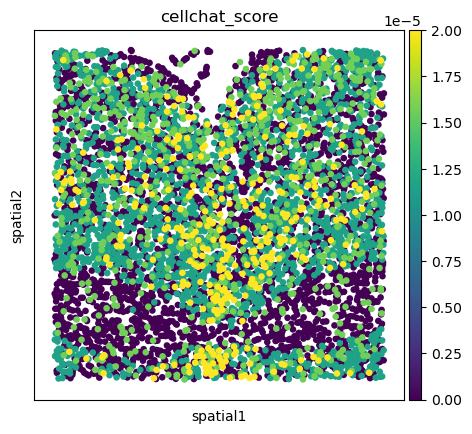

In [9]:
nest.plot.spatial(adata_sub, color="cellchat_score")

In [10]:
%%time
# Compute hotspots individually slice-by-slice (not 3D)
neighbor_eps=0.06
min_samples=5
hotspot_min_size=5

#sub_gene_list = ["Cck", "Penk"]
sub_gene_list = list(set(adata.var_names)-{'Fos'})
adata_sub_list = []
adata_sub_list_2 = []
region_vals = [6, 10, 14]
for val in tqdm(pd.unique(adata.obs.Bregma)):
    adata_sub = nest.data.get_data("merfish", bregma=val)[:, sub_gene_list].copy()
    nest.compute_gene_hotspots(adata_sub, eps=neighbor_eps, min_size=hotspot_min_size, min_samples=min_samples,
                            core_only=False, log=True)
    nest.interaction_hotspots(adata_sub, eps=neighbor_eps, min_size=hotspot_min_size, min_samples=min_samples,
                            core_only=False)
    adata_sub_list_2.append(adata_sub.copy())
    nest.hotspot_closure(adata_sub)
    nest.coexpression_hotspots(adata_sub, min_genes=3, verbose=False, threshold=0.5)
    nest.compute_multi_boundaries(adata_sub, 1, 0.01)
    adata_sub_list.append(adata_sub)
    #print(adata_sub.shape)

adata_combined = anndata.concat(adata_sub_list_2)

100%|██████████| 12/12 [05:32<00:00, 27.72s/it]


In [11]:
adata_sub = adata[adata.obs['Bregma'] == bregma_values[0]]
kd = KDTree(adata_sub.obsm['spatial'])

In [12]:
%%time
um_scale = adata.uns['um_scale']
secreted_std = 50 * um_scale
contact_threshold = 20 * um_scale

perform_permutations = False
activity_matrix = nest.compute_activity(adata, secreted_std=secreted_std,
                                        contact_threshold=contact_threshold,
                                        sig_threshold=0.95,
                                        perform_permutation=True,
                                        save_activity=True, verbose=True,
                                        min_active_count=20,
                                        interactions=None,
                                        z_key="z",
                                        K=None)


neighbor_eps=0.06
min_samples=5
hotspot_min_size=5

from nest.hotspot.hotspot import _compute_cutoff

cols = enumerate(list(activity_matrix))
method = "permutation"
z_key = "z"
region_dict = {}
for _, interaction in cols:
    data = activity_matrix[interaction]

    region_offset = 0

    regions = -1 * np.ones(adata.shape[0])
    for val in np.unique(adata.obs[z_key]):
        data_sub = data[adata.obs[z_key] == val]
        if method == 'permutation':
            cutoff = adata.uns['activity_significance_cutoff'][interaction]
        else:
            cutoff = _compute_cutoff(data_sub, log=False)
        inds = data > cutoff
        cur_slice_inds = np.logical_and(inds, adata.obs[z_key] == val)
        regions_sub = nest.compute_hotspots(adata=adata, input_data=np.where(cur_slice_inds)[0],
                                        return_regions=True, 
                                            eps=neighbor_eps, min_size=hotspot_min_size, min_samples=min_samples,
                                                core_only=False)
        # combine together into one array
        if regions_sub is None:
            continue
        out_inds = np.where(pd.notnull(regions_sub))[0]
        #print(out_inds)
        v = np.array(regions_sub[out_inds])
        regions[out_inds] = v + region_offset
        #print(regions[regions > 0])
        region_offset += np.max(v)
    if np.count_nonzero(regions != -1) > 0:
        regions = pd.Categorical(regions, categories=np.arange(1, np.max(regions) + 1))
        regions.categories = regions.categories.astype(np.int_)
    else:
        regions = None

    if regions is not None:
        region_dict[f"hotspots_{interaction}"] = regions
        
hotspots_df = pd.DataFrame(region_dict, index=adata.obs.index)
adata.obs.drop(adata.obs.filter(regex='hotspots_').columns.tolist(), axis=1, inplace=True)
adata.obs = pd.concat([adata.obs, hotspots_df], axis=1)

Computing activity scores


100%|██████████| 16/16 [07:16<00:00, 27.28s/it]


In [13]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [1.1, 1.1]
rc('font',**{'family':'serif','serif':['Arial'], 'size':7})

# Look at evolution of CCI over layers
lr_list = []
layer_list = []
score_list = []
for interaction in ["CCK_CCKAR", "UCN3_CRHR1", "TAC1_TACR1", "NTS_NTSR1", "CRH_CRHR1", "PENK_OPRL1"]:
    scores = []
    layers = list(range(1,13))
    for layer in range(12):
        adata_sub = adata_sub_list_2[layer]
        try:
            score = np.count_nonzero(pd.notnull(adata_sub.obs[f'hotspots_{interaction}']))/len(adata_sub)
        except KeyError:
            score = 0
        scores.append(score)
        score_list.append(score)
        layer_list.append(layer)
        lr_list.append(interaction)
    #fig, ax = plt.subplots()
    #fig.suptitle(interaction)
    #ax.scatter(bregma_values, scores, c='black', marker='x')
    
    #fig.savefig(f'images/merfish/vertical_activity_{interaction}.png', dpi=300, transparent=True, bbox_inches='tight')
df = pd.DataFrame({'layer': layer_list, 'interaction': lr_list, 'score': score_list})
df.to_csv('merfish_interaction_scores.csv')

In [14]:
%%time
from scipy.sparse import coo_matrix

# Combine interaction hotspots across layers
interaction = "GAL_GALR1"

kv = 20
k_inter = 3
gamma = 0.02
omega = 0.0001

plot_matching = False

layer_offset = 0
layer_offset_list = [0]

within_adj_list = []
inter_layer_edges = []

for layer in tqdm(range(12)):
    adata_sub_1 = adata[adata.obs.Bregma == bregma_values[layer]]
    
    inds_1 = np.where(pd.notnull(adata_sub_1.obs[f'hotspots_{interaction}']))[0]
    xs = adata_sub_1.obsm['spatial'][inds_1, :]
    kd_1 = KDTree(xs)
    dist_1, nn_1 = kd_1.query(x=xs, k=range(2,kv+2))
    
    # compute within_layer adjacency
    weights = np.exp(-(dist_1/0.04))
    weights[weights < 0.02] = 0
    i = np.ravel([(i,)*kv for i in range(len(xs))])
    j = np.ravel(nn_1)
    data = np.ravel(weights)
    n = adata_sub_1.shape[0]
    within_adj = coo_matrix((data, (i+layer_offset, j+layer_offset)), shape=(n, n))
    within_adj_list.append(within_adj)
    
    # add to between layer adjacency
    if layer < 11:
        adata_sub_2 = adata[adata.obs.Bregma == bregma_values[layer+1]]
        inds_2 = np.where(pd.notnull(adata_sub_2.obs[f'hotspots_{interaction}']))[0]
        xt = adata_sub_2.obsm['spatial'][inds_2, :]
        kd_2 = KDTree(xt)
        dist_2, nn_2 = kd_2.query(x=xt, k=range(2,kv+2))
        
        dist_12, nn_12 = kd_1.query(x=xt, k=k_inter)
        dist_21, nn_21 = kd_2.query(x=xs, k=k_inter)
        
        A = np.zeros((len(xs), len(xt)))
        C = cdist(xs, xt, metric='sqeuclidean')
        row_ind, col_ind = scipy.optimize.linear_sum_assignment(C)
        
        A[row_ind, col_ind] = 1
        for i, j in zip(row_ind, col_ind):
            v = np.where(A[nn_1[i], :])[1]
            weight = len(np.intersect1d(v, nn_2[j]))**2
            inter_layer_edges.append((i+layer_offset, j+layer_offset+len(xs), omega*weight))

    layer_offset += len(xs)
    layer_offset_list.append(layer_offset)
partitions = []
for adj in within_adj_list:
    adj.resize((layer_offset, layer_offset))
    g = ig.Graph.Weighted_Adjacency(adj)
    g.vs['node_size'] = 1
    partitions.append(la.RBConfigurationVertexPartition(g, weights='weight', resolution_parameter=gamma))
    
inter_layer_edges_arr = np.array(inter_layer_edges).T
data = inter_layer_edges_arr[2, :]
i = inter_layer_edges_arr[0, :].astype(np.int_)
j = inter_layer_edges_arr[1, :].astype(np.int_)
inter_layer_adj = coo_matrix((data, (i, j)))
inter_layer_adj.resize([layer_offset, layer_offset])
inter_g = ig.Graph.Weighted_Adjacency(inter_layer_adj)
inter_g.vs['node_size'] = 0
partitions.append(la.CPMVertexPartition(inter_g, weights='weight', resolution_parameter=0.0,
                                        node_sizes='node_size'))
                  
optimiser = la.Optimiser()

maxIters = 1
for iter in tqdm(range(maxIters)):
    diff = optimiser.optimise_partition_multiplex(partitions)
    if diff == 0:
        break
        
full_membership = partitions[0].membership
print(len(np.unique(full_membership)))


        
# break down membership by layers
layer_membership = []
for layer in range(12):
    layer_membership.append(full_membership[layer_offset_list[layer]:layer_offset_list[layer+1]])

100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

9


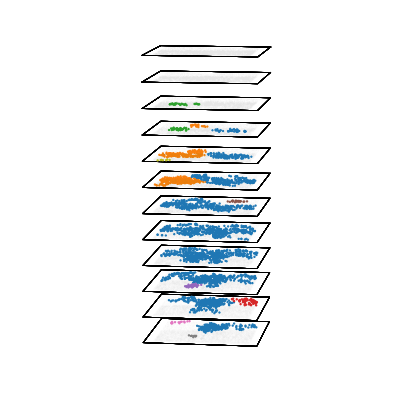

In [15]:
%%time
# 3D Plot of layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 5]
rc('font',**{'family':'serif','serif':['Arial'], 'size':7})
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=9, azim=98)

zscale = 0.15

gene = "Penk"

#cmap = sns.color_palette("Blues", as_cmap=True)
cmap = sns.color_palette("tab10", as_cmap=True)

pts_dict = {k: np.empty(shape=(0, 3)) for k in range(20)}

layer_min = 0
for layer in range(layer_min,12):
    adata_sub = adata[adata.obs.Bregma == bregma_values[layer]]
    coords = adata_sub.obsm['spatial']
    inds = np.where(pd.notnull(adata_sub.obs[f'hotspots_{interaction}']))[0]
    ax.scatter(coords[:, 0], coords[:, 1], zscale*layer, color=[0.9, 0.9, 0.9, 0.01], s=0.1)
    for k in range(20):
        inds_2 = np.where(np.array(layer_membership[layer])==k)[0]
        inds_2 = inds[inds_2]
        
        coords3 = np.concatenate([coords[inds_2, :], zscale*layer*np.ones((len(inds_2),1))], axis=1)
        
        pts_dict[k] = np.concatenate([pts_dict[k], coords3], axis=0)

        ax.scatter(coords[inds_2, 0], coords[inds_2, 1], zscale*(layer-layer_min), color=cmap(k), s=0.5, alpha=1)
        
        
        # draw boundary around the slice
        eps = 0.09
        xs = [-eps, -eps, 1+eps, 1+eps, -eps]
        ys = [-eps, 1+eps, 1+eps, -eps, -eps]
        ax.plot(xs, ys, zscale*(layer-layer_min), color="k", linewidth=0.5)

    
# Make panes transparent
ax.xaxis.pane.fill = False # Left pane
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Remove grid lines
ax.grid(False)

# Remove tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Transparent spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Transparent panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# No ticks
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])
ax.set_zlim([0*zscale-0.2, (12-layer_min)*zscale])

ax.set_box_aspect((2, 2, 6))
plt.savefig(f'images/merfish/{interaction}_stack_2.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

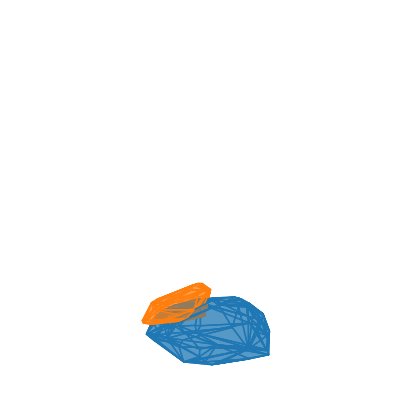

In [16]:
%%time
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=15, azim=105)

for k in range(20):
    pts = pts_dict[k]
    
    # skip any communities that are present in only one layer
    if len(np.unique(pts[:, 2])) < 3:
        continue
        
    hull = ConvexHull(pts)
    faces = hull.simplices

    for s in faces:
        sq = [
            [pts[s[0], 0], pts[s[0], 1], pts[s[0], 2]],
            [pts[s[1], 0], pts[s[1], 1], pts[s[1], 2]],
            [pts[s[2], 0], pts[s[2], 1], pts[s[2], 2]]
        ]

        f = Poly3DCollection([sq])
        f.set_color(cmap(k))
        #f.set_edgecolor('k')
        f.set_alpha(0.5)
        ax.add_collection3d(f)
        
    
# Make panes transparent
ax.xaxis.pane.fill = False # Left pane
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False# Right pane

# Remove grid lines
ax.grid(False)

# Remove tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Transparent spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Transparent panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# No ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_zlim([0,6])

ax.set_box_aspect((2, 2, 6))

plt.savefig(f'images/merfish/{interaction}_convex_hull.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

# 3D Segmentation

100%|██████████| 3/3 [00:41<00:00, 13.91s/it]


14


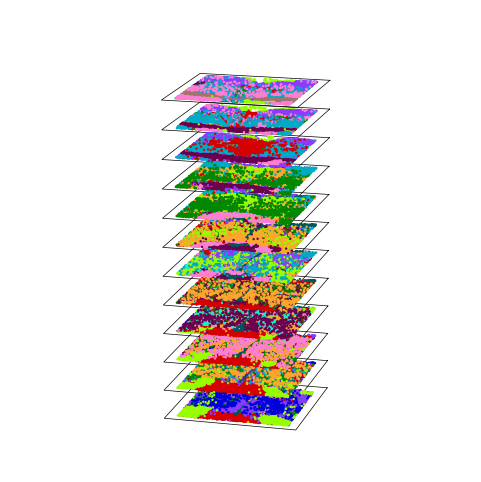

100%|██████████| 3/3 [00:35<00:00, 11.83s/it]


20


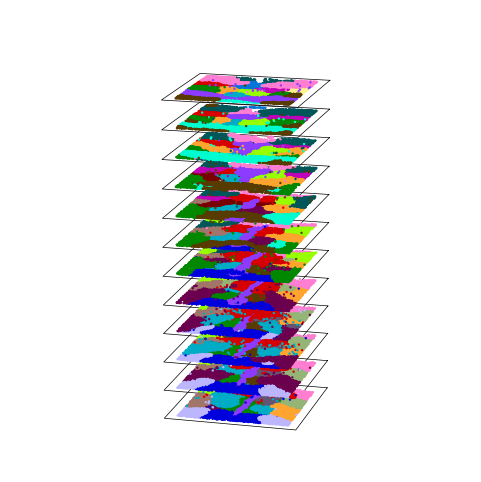

100%|██████████| 3/3 [00:32<00:00, 10.80s/it]


26


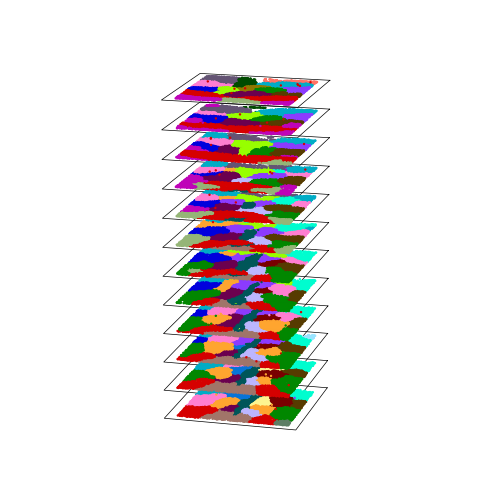

100%|██████████| 3/3 [00:31<00:00, 10.43s/it]


31


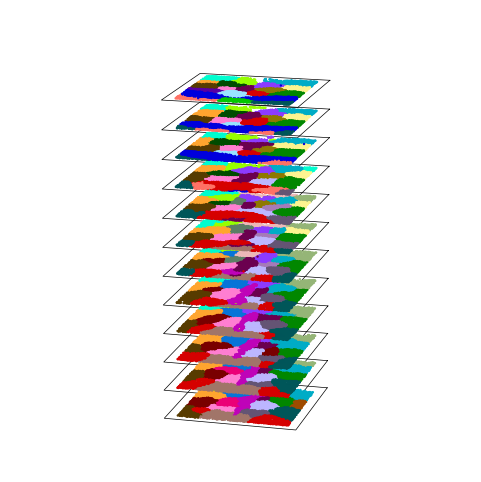

100%|██████████| 3/3 [00:31<00:00, 10.34s/it]


36


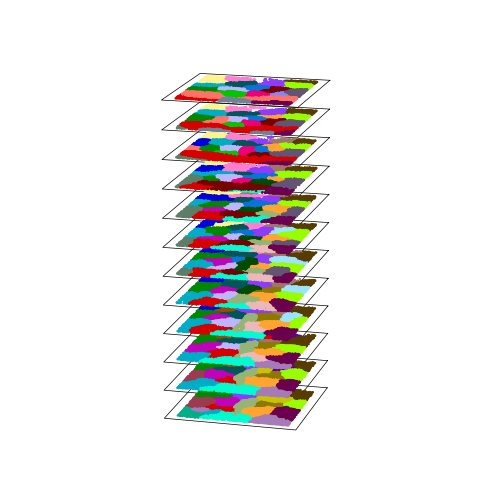

In [17]:
%%time
kv = 20
k_inter = 5
gamma = 1
omega = 0.0001
alpha = 0.2
full_membership_by_pca = {}
#omega = 0
for n_pca in [4, 8, 16, 32, 64]:
    # PCA reduction over all layers
    sc.tl.pca(adata_combined, n_comps=n_pca)

    plot_matching = False

    layer_offset = 0
    layer_offset_list = [0]

    within_adj_list = []
    inter_layer_edges = []

    for layer in tqdm(range(12)):
        adata_sub_1 = adata_combined[adata_combined.obs['Bregma']==bregma_values[layer], :]
        X_pca = adata_sub_1.obsm['X_pca']
        xs = adata_sub_1.obsm['spatial']
        kd_1 = KDTree(xs)
        dist_1, nn_1 = kd_1.query(x=xs, k=range(2,kv+2))
        dist_weights = np.exp(-(dist_1/0.04))
        
        kd_pca = KDTree(X_pca)
        dist_pca, nn_pca = kd_pca.query(x=X_pca, k=range(2,kv+2))
        exp_weights = np.exp(-np.linalg.norm(X_pca.reshape((-1, 1, n_pca)) - X_pca[nn_1, :], axis=-1)/2)
        
        # compute within_layer adjacency
        i = np.ravel([(i,)*kv for i in range(len(xs))])
        j = np.ravel(nn_1)
        data = np.ravel(dist_weights)
        within_adj_dist = coo_matrix((data, (i+layer_offset, j+layer_offset))).tocsr()
        
        i = np.ravel([(i,)*kv for i in range(len(xs))])
        j = np.ravel(nn_pca)
        data = np.ravel(exp_weights)
        within_adj_expr = coo_matrix((data, (i+layer_offset, j+layer_offset))).tocsr()
        
        within_adj = (alpha*within_adj_dist + (1-alpha)*within_adj_expr).tocoo()
        
        within_adj_list.append(within_adj)
        
        
        # add to between layer adjacency
        if layer < 11:
            adata_sub_2 = adata_combined[adata_combined.obs['Bregma']==bregma_values[layer+1], :]
            X_pca_2 = adata_sub_2.obsm['X_pca']
            xt = adata_sub_2.obsm['spatial']
            kd_2 = KDTree(xt)
            dist_2, nn_2 = kd_2.query(x=xt, k=range(2,kv+2))
            
            dist_12, nn_12 = kd_1.query(x=xt, k=k_inter)
            dist_21, nn_21 = kd_2.query(x=xs, k=k_inter)
            
            A = np.zeros((len(xs), len(xt)))
            C = cdist(xs, xt, metric='sqeuclidean')
            row_ind, col_ind = scipy.optimize.linear_sum_assignment(C)
            
            A[row_ind, col_ind] = 1
            for i, j in zip(row_ind, col_ind):
                v = np.where(A[nn_1[i], :])[1]
                weight = len(np.intersect1d(v, nn_2[j]))**2
                inter_layer_edges.append((i+layer_offset, j+layer_offset+len(xs), omega*weight))


        #break

        layer_offset += len(xs)
        layer_offset_list.append(layer_offset)

        
        
    partitions = []
    for adj in within_adj_list:
        adj.resize((layer_offset, layer_offset))
        g = ig.Graph.Weighted_Adjacency(adj)
        g.vs['node_size'] = 1
        partitions.append(la.RBConfigurationVertexPartition(g, weights='weight', resolution_parameter=gamma))
        #partitions.append(la.CPMVertexPartition(g, weights='weight', resolution_parameter=gamma,
        #                                       node_sizes='node_size'))

    inter_layer_edges_arr = np.array(inter_layer_edges).T
    data = inter_layer_edges_arr[2, :]
    i = inter_layer_edges_arr[0, :].astype(np.int_)
    j = inter_layer_edges_arr[1, :].astype(np.int_)
    inter_layer_adj = coo_matrix((data, (i, j)))
    inter_layer_adj.resize([layer_offset, layer_offset])
    inter_g = ig.Graph.Weighted_Adjacency(inter_layer_adj)
    inter_g.vs['node_size'] = 0
    partitions.append(la.CPMVertexPartition(inter_g, weights='weight', resolution_parameter=0.0,
                                            node_sizes='node_size'))

    optimiser = la.Optimiser()

    maxIters = 3
    for iter in tqdm(range(maxIters)):
        diff = optimiser.optimise_partition_multiplex(partitions)
        if diff == 0:
            break

    full_membership = np.array(partitions[0].membership)
    print(len(np.unique(full_membership)))



    # break down membership by layers
    layer_membership = []
    for layer in range(12):
        layer_membership.append(full_membership[layer_offset_list[layer]:layer_offset_list[layer+1]])
    full_membership_by_pca[n_pca] = full_membership
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [6, 6]
    rc('font',**{'family':'serif','serif':['Arial'], 'size':7})
    import colorcet as cc
    ax = plt.figure().add_subplot(projection='3d')
    ax.view_init(elev=15, azim=105)

    zscale = 0.5


    #cmap = sns.color_palette("Blues", as_cmap=True)
    #cmap = sns.color_palette("tab20", as_cmap=True)
    cmap = np.array(sns.color_palette(cc.glasbey, n_colors=len(np.unique(full_membership)), as_cmap=True))

    def cmap_(x):
        if x >= 20:
            return 1

    pts_dict = {k: np.empty(shape=(0, 3)) for k in range(20)}

    groups = [0]

    for layer in range(0, 12):
        adata_sub = adata_sub_list_2[layer]
        for val in np.unique(layer_membership[layer]):
            coords = adata_sub.obsm['spatial']
            c = cmap[layer_membership[layer]]
            inds = layer_membership[layer] == val
            coords = coords[inds, :]
            c = c[inds]

            coords3 = np.concatenate([coords, zscale*layer*np.ones((len(coords),1))], axis=1)

            ax.scatter(coords[:, 0], coords[:, 1], zscale*layer, c=c, s=0.5, alpha=1)

        # draw boundary around the slice
        eps = 0.09
        xs = [-eps, -eps, 1+eps, 1+eps, -eps]
        ys = [-eps, 1+eps, 1+eps, -eps, -eps]
        ax.plot(xs, ys, zscale*layer, color="k", linewidth=0.5)


    # Make panes transparent
    ax.xaxis.pane.fill = False # Left pane
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Remove grid lines
    ax.grid(False)

    # Remove tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    # Transparent spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Transparent panes
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # No ticks
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.1, 1.1])
    ax.set_zlim([-0.5, 6.5])

    ax.set_box_aspect((2, 2, 6))
    plt.savefig(f'images/merfish/3d_clustering_stack_{n_pca}.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()

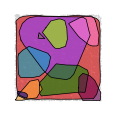

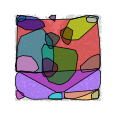

In [18]:
for k in [1, -1]:
    fig, ax = plt.subplots(figsize=(1.25, 1.25))
    nest.plot.multi_hotspots(adata_sub_list[k], ax=ax, show=False)
    fig.savefig(os.path.expanduser(f'images/merfish/coex_{k}.pdf'), dpi=300, bbox_inches='tight', transparent=True)

In [19]:
inds_a = np.where(full_membership == 11)[0]
inds_b = np.where(full_membership != 11)[0]
res = nest.differential_expression(adata_combined, inds_a, inds_b)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


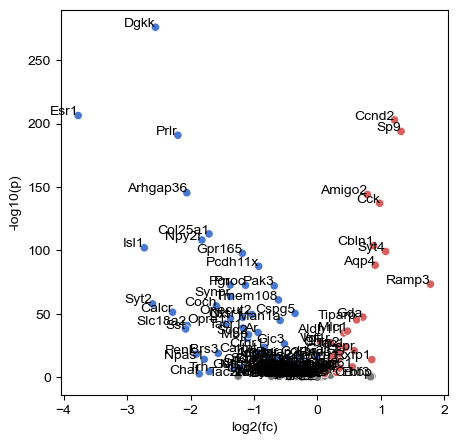

<AxesSubplot: xlabel='log2(fc)', ylabel='-log10(p)'>

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 5]
rc('font',**{'family':'serif','serif':['Arial'], 'size': 10})
nest.plot.volcano(res, gene_list=True)

In [21]:
res.index[res["-log10(p)"] == np.inf]

Index(['Gad1', 'Irs4', 'Necab1', 'Ntng1', 'Slc17a6'], dtype='object')

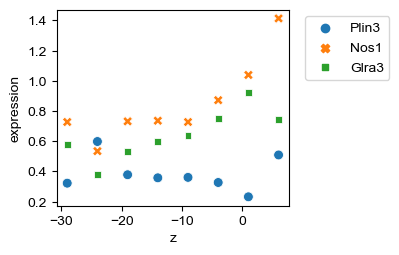

In [23]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [3, 3]
rc('font',**{'family':'serif','serif':['Arial'], 'size': 10})

gene = ["Plin3", "Nos1", "Glra3"]
adata_sub = adata_combined[full_membership == 1, gene]
adata_sub = adata_sub[adata_sub.obs.Bregma <= 8, :]
x = adata_sub.obs['Bregma'].to_numpy()
y = adata_sub.X.toarray()
df = pd.DataFrame({'z':x, **{gene[k]: y[:, k] for k in range(len(gene))}})
mean_expr = df.groupby('z').mean()
ax = sns.scatterplot(data=mean_expr, s=50)
ax.set_ylabel('expression')
ax.set_aspect(25)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig(f'images/merfish/vertical_variation.png', dpi=300, transparent=True, bbox_inches='tight')